Import Libraries

WHY THE VARIABLE DATA OF TIMESTAMP IS NOT USED BECAUSE OF THE REASONS : The timestamp variable represents the time at which each reading was taken. This can be useful in some cases, especially if the sequence or timing of the readings is important for your problem. However, the models you're currently using (KNN, Decision Tree, and Gaussian Naive Bayes) don't take the sequence of the data into account, so the timestamp variable wouldn't be directly useful for them.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Load your data
data = pd.read_csv('data/accelerometer_gyro_mobile_phone_dataset.csv')

# Handle missing values
data = data.dropna()

# Standardize the features
scaler = StandardScaler()
features = ['accX', 'accY', 'accZ', 'gyroX', 'gyroY', 'gyroZ']
data[features] = scaler.fit_transform(data[features])

# Split the data
X = data[features]
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Read Dataset

In [3]:
# Train a KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate the KNN classifier
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')

# Train a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Evaluate the Decision Tree classifier
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Decision Tree Accuracy: {dt_accuracy}')

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the Gaussian Naive Bayes classifier
gnb_predictions = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f'Gaussian Naive Bayes Accuracy: {gnb_accuracy}')

KNN Accuracy: 0.9835911861228317
Decision Tree Accuracy: 0.9748398187216752
Gaussian Naive Bayes Accuracy: 0.9834349117049539


Data Overview

OTHER METRICS RESULTS

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics for KNN
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
knn_cm = confusion_matrix(y_test, knn_predictions)

print(f'KNN Precision: {knn_precision}')
print(f'KNN Recall: {knn_recall}')
print(f'KNN F1 Score: {knn_f1}')
print(f'KNN Confusion Matrix:\n {knn_cm}')

# Calculate metrics for Decision Tree
dt_precision = precision_score(y_test, dt_predictions, average='weighted')
dt_recall = recall_score(y_test, dt_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')
dt_cm = confusion_matrix(y_test, dt_predictions)

print(f'Decision Tree Precision: {dt_precision}')
print(f'Decision Tree Recall: {dt_recall}')
print(f'Decision Tree F1 Score: {dt_f1}')
print(f'Decision Tree Confusion Matrix:\n {dt_cm}')

# Calculate metrics for Gaussian Naive Bayes
gnb_precision = precision_score(y_test, gnb_predictions, average='weighted')
gnb_recall = recall_score(y_test, gnb_predictions, average='weighted')
gnb_f1 = f1_score(y_test, gnb_predictions, average='weighted')
gnb_cm = confusion_matrix(y_test, gnb_predictions)

print(f'Gaussian Naive Bayes Precision: {gnb_precision}')
print(f'Gaussian Naive Bayes Recall: {gnb_recall}')
print(f'Gaussian Naive Bayes F1 Score: {gnb_f1}')
print(f'Gaussian Naive Bayes Confusion Matrix:\n {gnb_cm}')

KNN Precision: 0.9789131359991371
KNN Recall: 0.9835911861228317
KNN F1 Score: 0.9801630718149734
KNN Confusion Matrix:
 [[  22   84]
 [  21 6272]]
Decision Tree Precision: 0.9767316431204003
Decision Tree Recall: 0.9748398187216752
Decision Tree F1 Score: 0.975756696912762
Decision Tree Confusion Matrix:
 [[  34   72]
 [  89 6204]]
Gaussian Naive Bayes Precision: 0.9671442255601305
Gaussian Naive Bayes Recall: 0.9834349117049539
Gaussian Naive Bayes F1 Score: 0.9752215410273045
Gaussian Naive Bayes Confusion Matrix:
 [[   0  106]
 [   0 6293]]


In [5]:
#EXPLORATORY OF DATA OF MULTIVARIATE DATA

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


# Summary statistics
data = pd.read_csv('data/accelerometer_gyro_mobile_phone_dataset.csv')
print(data.describe())


               accX          accY          accZ         gyroX         gyroY  \
count  31991.000000  31991.000000  31991.000000  31991.000000  31991.000000   
mean       0.023825      2.153858      9.537909     -0.004493     -0.014756   
std        0.741396      1.085466      2.056358      0.307643      0.249201   
min       -3.673361     -4.386029      4.296066     -1.470421     -1.430659   
25%       -0.472193      1.413062      7.794217     -0.149783     -0.162656   
50%       -0.024998      2.119143      9.406739      0.022301     -0.011060   
75%        0.477208      2.928435     11.158845      0.177978      0.124966   
max        4.678671      6.377039     17.591568      1.332722      1.480135   

              gyroZ      Activity  
count  31991.000000  31991.000000  
mean      -0.007021      0.982151  
std        0.266120      0.132404  
min       -1.894102      0.000000  
25%       -0.154126      1.000000  
50%        0.005261      1.000000  
75%        0.152061      1.000000  


<Axes: >

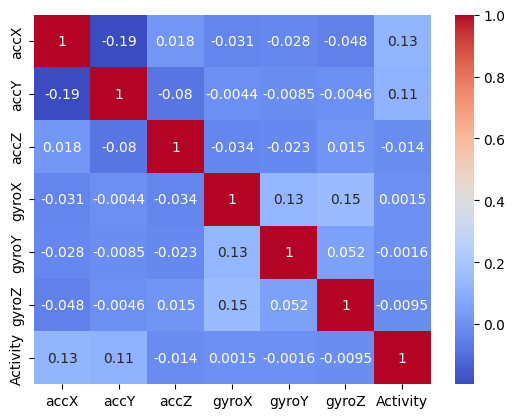

In [6]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = data_numeric.corr()

# Plot the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')

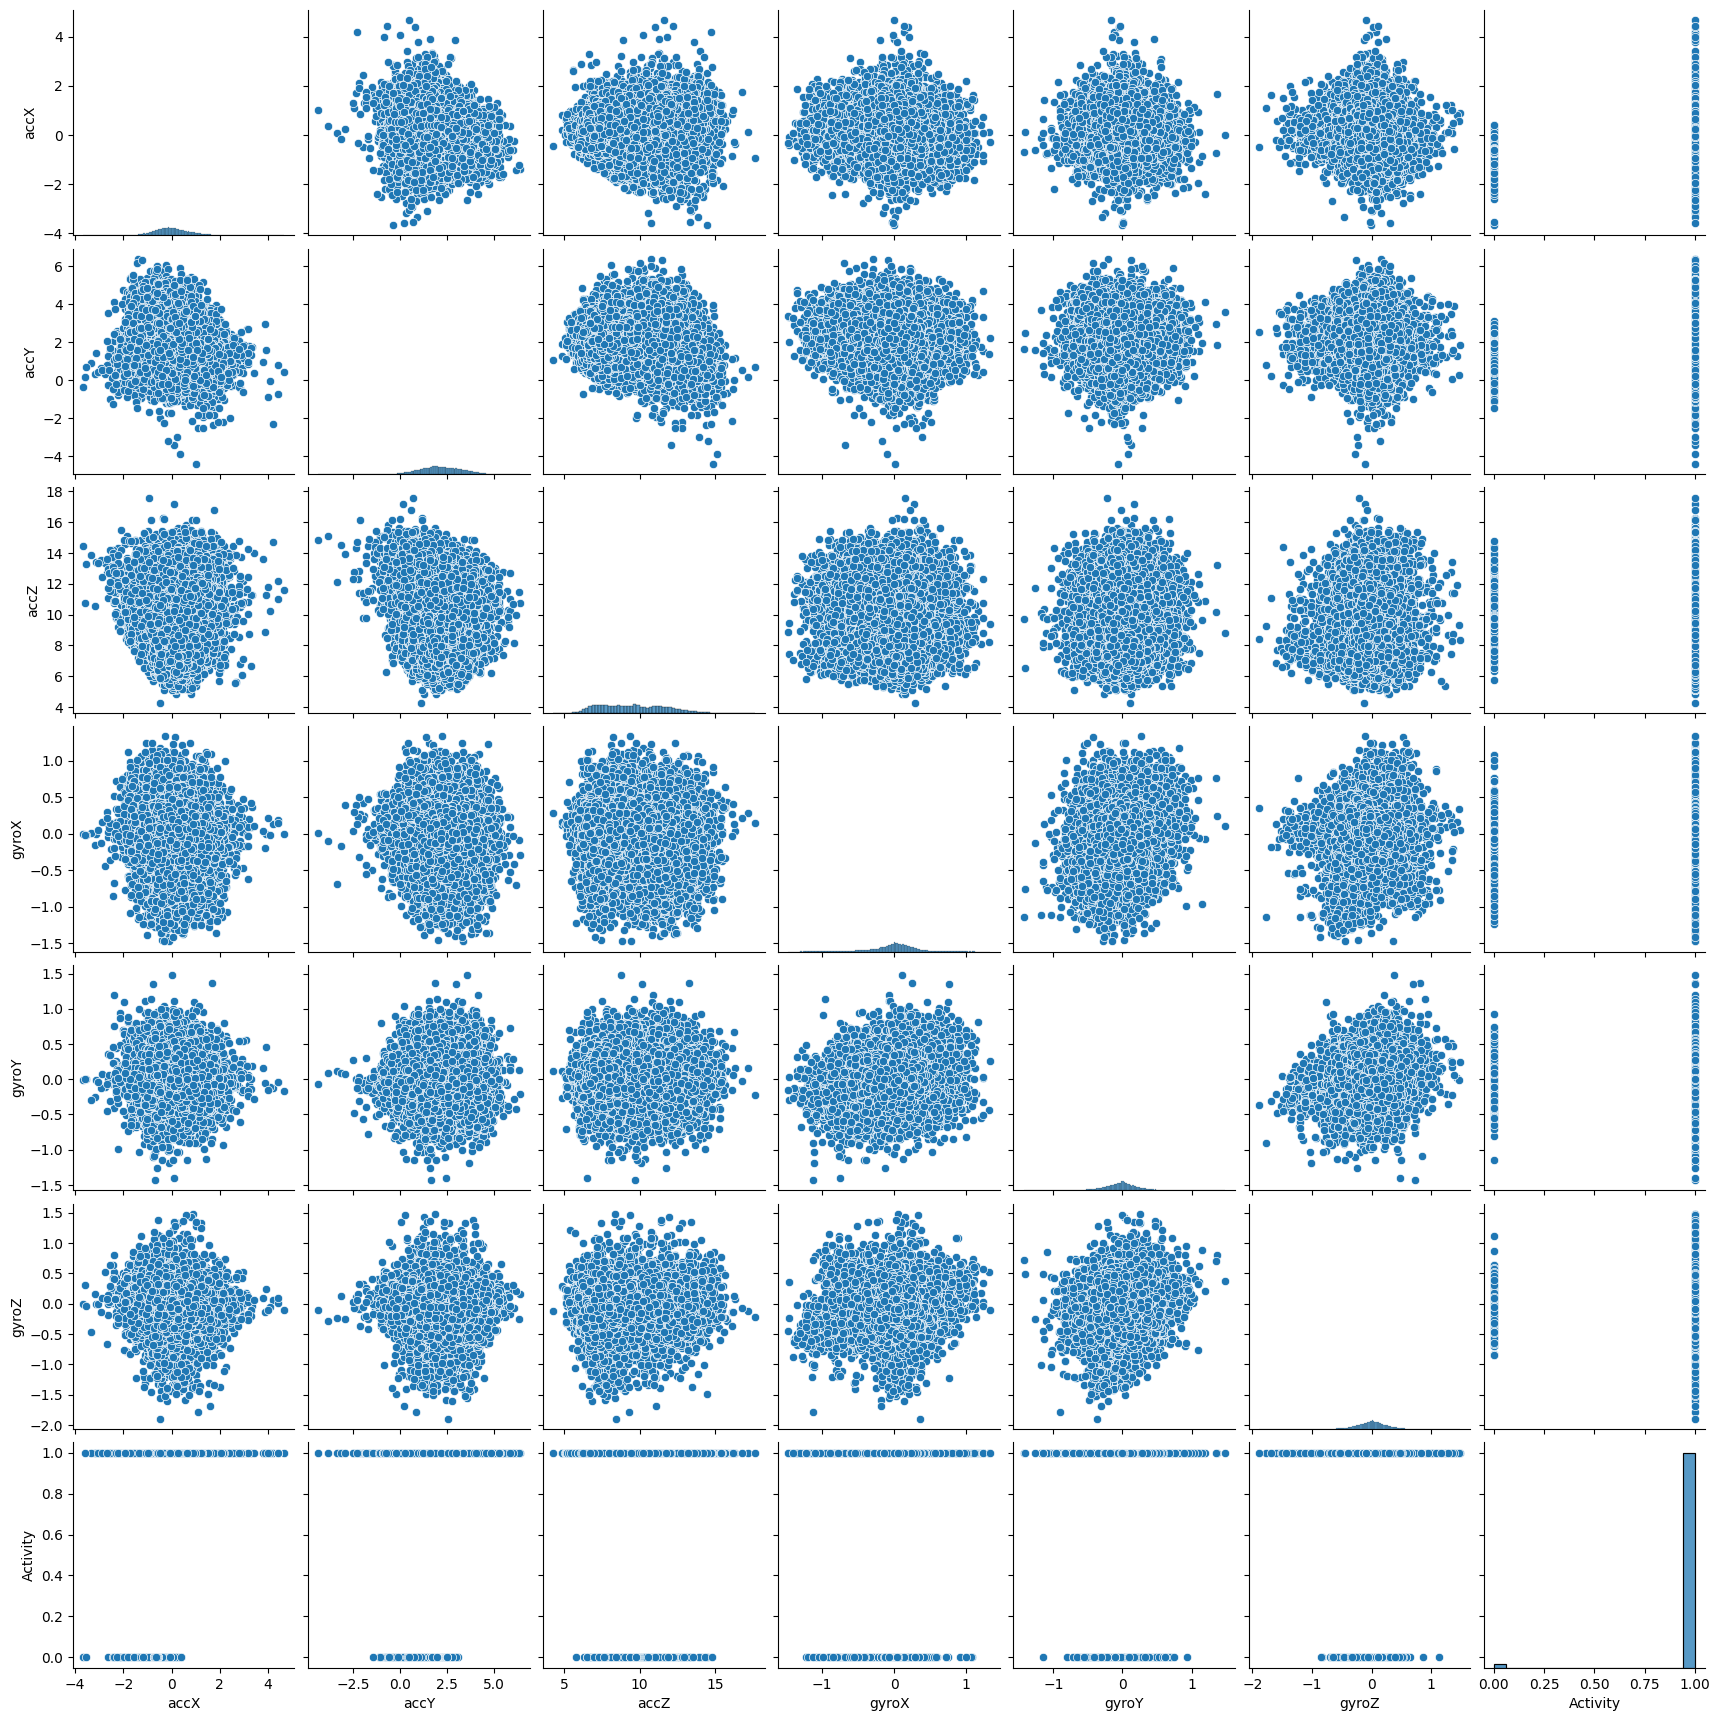

In [7]:
# Pairplot
sns.pairplot(data)

array([[<Axes: xlabel='accX', ylabel='accX'>,
        <Axes: xlabel='accY', ylabel='accX'>,
        <Axes: xlabel='accZ', ylabel='accX'>,
        <Axes: xlabel='gyroX', ylabel='accX'>,
        <Axes: xlabel='gyroY', ylabel='accX'>,
        <Axes: xlabel='gyroZ', ylabel='accX'>,
        <Axes: xlabel='Activity', ylabel='accX'>],
       [<Axes: xlabel='accX', ylabel='accY'>,
        <Axes: xlabel='accY', ylabel='accY'>,
        <Axes: xlabel='accZ', ylabel='accY'>,
        <Axes: xlabel='gyroX', ylabel='accY'>,
        <Axes: xlabel='gyroY', ylabel='accY'>,
        <Axes: xlabel='gyroZ', ylabel='accY'>,
        <Axes: xlabel='Activity', ylabel='accY'>],
       [<Axes: xlabel='accX', ylabel='accZ'>,
        <Axes: xlabel='accY', ylabel='accZ'>,
        <Axes: xlabel='accZ', ylabel='accZ'>,
        <Axes: xlabel='gyroX', ylabel='accZ'>,
        <Axes: xlabel='gyroY', ylabel='accZ'>,
        <Axes: xlabel='gyroZ', ylabel='accZ'>,
        <Axes: xlabel='Activity', ylabel='accZ'>],
       [<A

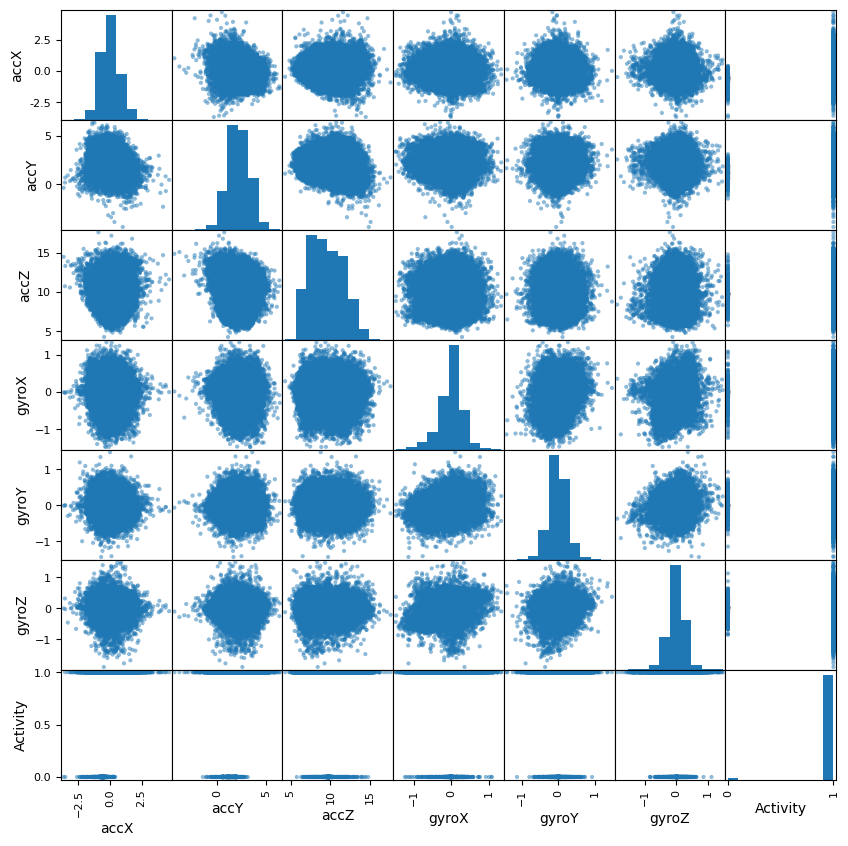

In [8]:
# Scatter matrix
pd.plotting.scatter_matrix(data, figsize=(10, 10))

In [9]:
#DISPLAY THE CORRELATION MATRIX
print(corr)

              accX      accY      accZ     gyroX     gyroY     gyroZ  Activity
accX      1.000000 -0.194325  0.018496 -0.031462 -0.027962 -0.047648  0.126771
accY     -0.194325  1.000000 -0.079527 -0.004358 -0.008545 -0.004644  0.113486
accZ      0.018496 -0.079527  1.000000 -0.033973 -0.022959  0.014923 -0.014448
gyroX    -0.031462 -0.004358 -0.033973  1.000000  0.129692  0.146878  0.001469
gyroY    -0.027962 -0.008545 -0.022959  0.129692  1.000000  0.051621 -0.001606
gyroZ    -0.047648 -0.004644  0.014923  0.146878  0.051621  1.000000 -0.009460
Activity  0.126771  0.113486 -0.014448  0.001469 -0.001606 -0.009460  1.000000
